<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Neural-Network-and-Deep-Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9026 - loss: 0.3192
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9853 - loss: 0.0454
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9903 - loss: 0.0302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Label: 7
Actual Label: 7


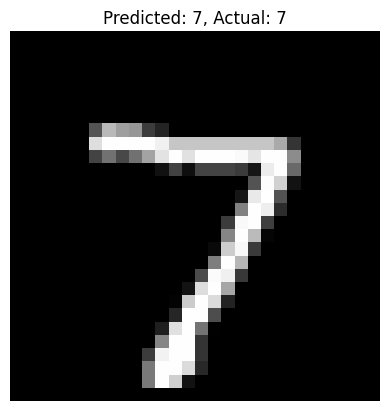

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile and Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3) # Training for 3 epochs for speed

# 5. Predict a Single Example
index = 0  # Change this number to test different images
image = x_test[index]
true_label = y_test[index]

# Add batch dimension (1, 28, 28, 1) needed for prediction
prediction_scores = model.predict(image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction_scores)

# 6. Show Result
print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {true_label}")

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis('off')
plt.show()

Training model... (this may take a minute)
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9034 - loss: 0.3257
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9847 - loss: 0.0490
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9909 - loss: 0.0305

Enter a number between 0 and 9999 to test (or 'q' to quit): 100
-----------------------------
Model Prediction: 6
Actual Label:     6
-----------------------------


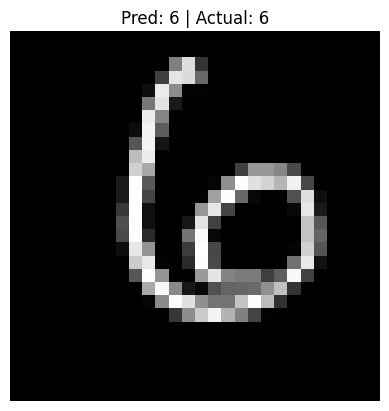

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile and Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Training model... (this may take a minute)")
model.fit(x_train, y_train, epochs=3, verbose=1)

# 5. User Input Loop
while True:
    try:
        user_input = input("\nEnter a number between 0 and 9999 to test (or 'q' to quit): ")
        if user_input.lower() == 'q':
            break

        index = int(user_input)
        if index < 0 or index >= 10000:
            print("Please enter a valid index between 0 and 9999.")
            continue

        # Get the specific image and label
        image = x_test[index]
        true_label = y_test[index]

        # Predict
        # Reshape to (1, 28, 28, 1) because model expects a batch
        prediction_scores = model.predict(image.reshape(1, 28, 28, 1), verbose=0)
        predicted_label = np.argmax(prediction_scores)

        # Output Results
        print(f"-----------------------------")
        print(f"Model Prediction: {predicted_label}")
        print(f"Actual Label:     {true_label}")
        print(f"-----------------------------")

        # Show Image
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_label} | Actual: {true_label}")
        plt.axis('off')
        plt.show()

    except ValueError:
        print("Invalid input. Please enter a number.")